## Test notebook pour Runa

Nous commençons par 

In [1]:
# pip install --upgrade pip


In [ ]:
pip install pyyaml==5.1

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys, os, distutils.core

!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

fatal: destination path 'detectron2' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61443 sha256=a5d8a3fa25f13b8362c0159b36ddcedcf813986c878bbcbf0f9e4e7ab809c9a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-8eu1btix/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62432c7d6b1ca9fa22aef9d70a16a
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144591 sha256=ba293

In [6]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Oct_29_23:50:19_PDT_2024
Cuda compilation tools, release 12.6, V12.6.85
Build cuda_12.6.r12.6/compiler.35059454_0
torch:  2.6 ; cuda:  df5bbc09d1.nv24.11
detectron2: 0.6


In [15]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-pa

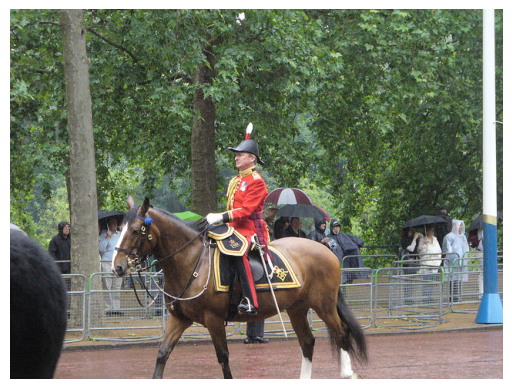

In [17]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [18]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[02/11 21:15:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 193MB/s]                             

Successfully downloaded /home/vibrant_lederberg/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl. 177841981 bytes.
URL https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl cached in /home/vibrant_lederberg/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
[Checkpointer] Loading from /home/vibrant_lederberg/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


Reading a file from 'Detectron2 Model Zoo'


/usr/local/lib/python3.12/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=9.6.
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal'

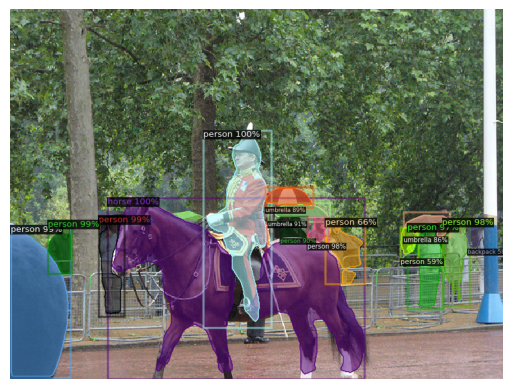

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


plt.imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [31]:
def detect_crop_and_blur(image, predictor, blur_ksize=31):
    """
    image : numpy array BGR (cv2.imread)
    predictor : Detectron2 DefaultPredictor
    blur_ksize : taille du kernel de flou (impair)

    retourne :
        results : liste de dict :
            {
                "box": [x1, y1, x2, y2],
                "crop": image cropée,
                "blurred": image globale floutée sauf la box
            }
    """

    outputs = predictor(image)
    instances = outputs["instances"].to("cpu")

    if len(instances) == 0:
        return []

    boxes = instances.pred_boxes.tensor.numpy()

    results = []

    for box in boxes:
        x1, y1, x2, y2 = map(int, box)

        # Crop régional
        crop = image[y1:y2, x1:x2].copy()

        # Blur global (tout flouter)
        blurred_img = cv2.GaussianBlur(image, (blur_ksize, blur_ksize), 0)

        # Remettre la région nette
        blurred_img[y1:y2, x1:x2] = image[y1:y2, x1:x2]

        results.append({
            "box": [x1, y1, x2, y2],
            "crop": crop,
            "blurred": blurred_img
        })

    return results


In [32]:
im = cv2.imread("./input.jpg")

results = detect_crop_and_blur(im, predictor)

print("Nombre d'objets détectés :", len(results))


Nombre d'objets détectés : 15


In [33]:
import matplotlib.pyplot as plt

def show_crop_and_blur(results, max_images=5):
    """
    results : liste renvoyée par detect_crop_and_blur()
    max_images : nombre max d'objets à afficher
    """

    n = min(len(results), max_images)

    for i in range(n):
        crop = results[i]["crop"]
        blurred = results[i]["blurred"]
        box = results[i]["box"]

        plt.figure(figsize=(10,4))

        plt.subplot(1,2,1)
        plt.title(f"Crop {i} | box={box}")
        plt.imshow(crop[:, :, ::-1])  # BGR → RGB
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.title(f"Blurred {i}")
        plt.imshow(blurred[:, :, ::-1])  # BGR → RGB
        plt.axis("off")

        plt.show()


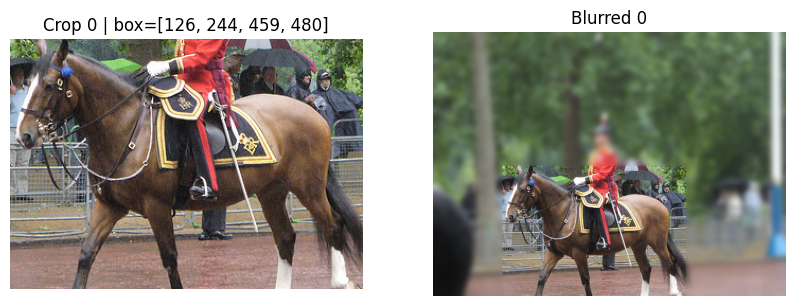

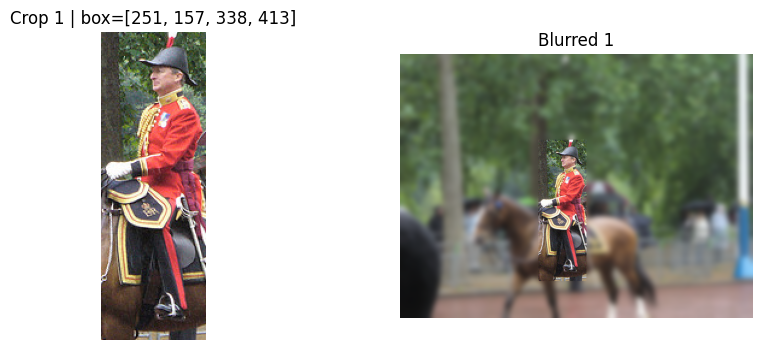

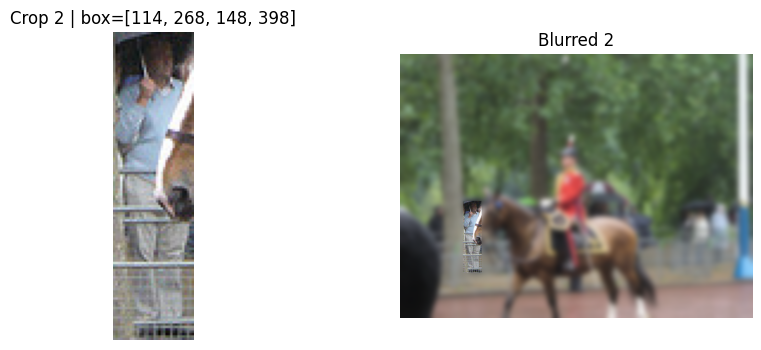

In [34]:
show_crop_and_blur(results, max_images=3)